In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [54]:
from astropy.coordinates import SkyCoord
from hips.utils import WCSGeometry
from hips import HipsSurveyProperties, HipsTile, HipsTileMeta, SimpleTilePainter

In [92]:
geometry = WCSGeometry.create_simple(
     skydir=SkyCoord(0, 0, unit='deg', frame='galactic'),
     width=2000, height=1000, fov="5 deg",
     coordsys='galactic', projection='AIT'
)

In [93]:
url = 'http://alasky.u-strasbg.fr/Fermi/Color/properties'
hips_survey = HipsSurveyProperties.fetch(url)

In [94]:
painter = SimpleTilePainter(geometry, hips_survey, 'jpg')
painter.run()

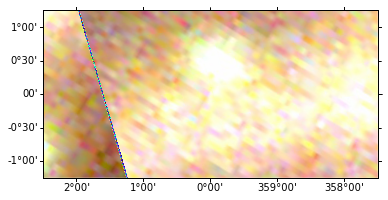

In [100]:
from astropy.visualization.mpl_normalize import simple_norm

ax = plt.subplot(projection=geometry.wcs)
norm = simple_norm(painter.image, 'asinh')
data = painter.image.astype(np.uint8)
ax.imshow(data, origin='lower')

### Prining tile index values

In [83]:
print(data[100, 200])
print(painter.image[100, 200])

[250 238 193]
[ 250.81559736  238.58198683  193.7837158 ]


In [62]:
painter.tile_indices

array([450, 451])